# [1. 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning - 이유한](https://kaggle-kr.tistory.com/17?category=868316#1)

- 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델 생성이 주 목표
- 시각화 도구 matplotlib, seaborn, plotly
- 데이터 분석 도구 pandas, numpy
- 머신러닝 도구 sklearn

#### 데이터 분석의 과정 

##### 1. 데이터셋 확인 - null data 존재하는지 확인하고 향후 수정한다. 
##### 2. 탐색적 데이터 분석 (EDA) - 여러 feature들을 개별적으로 분석, feature 간의 상관관계를 확인.  여러 시각화 툴을 사용하여 insight를 얻는다.
##### 3. Feature Engineering - 모델을 세우기 전 모델의 성능을 높이기 위한 과정 ( One-Hot Encoding, class로 나누기, 구간 나누기 , 텍스트 데이터 처리 등)
##### 4. model 생성 - sklearn을 이용하여 모델을 생성한다. 딥러닝 - tensorflow, pytorch 등 사용 
##### 5. 모델 학습 및 예측 - train set을 가지고 모델을 학습시킨 후 , test set 을 가지고 예측한다.
##### 6. 모델 평가 - 예측 성능이 원하는 수준인지 판단. 풀려는 문제에 따라 모델을 평가하는 방식이 달라지고 학습된 모델이 어떤 것을 학습하였는지 확인해본다. 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
#matplotlib의 scheme말고 seaborn scheme 세팅 
#일일히 graph font size 지정할 필요 없이 font_scale을 사용하여 편하게 사이즈 조정

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. DATASET 확인

#### - 파이썬에서 테이블화 된 데이터를 다루는데 가장 최적화
#### - pandas가 가장 많이 사용되어지고 있다.
#### - pandas를 이용한 간단한 통계적 분석부터 간단한 메소드를 사용하여 복잡한 처리들을 해내는 과정 수행 
#### - 캐글에서 데이터 셋은 train / test 두가지로 나뉘어 있다.  

In [5]:
df_train= pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

 -df_train = pd.read_csv('../input/train.csv')  
 -df_test = pd.read_csv('../input/test.csv')  
##### - 해당 폴더에 있을 경우 ('./데이터셋.') 으로 하면 되는 것 같다. 

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루는 문제(test)에서 feature는 Pclass, Age, Sibsp, Parch, Fare 예측하려는 target label은 Survived (생존자) 이다.  
(순서대로 티켓 클래스, 나이, 형제와 배우자의 수, 함께 탑승한 아이와 부모의 수 , 탑승료)

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 판다스의 describe() 메소드는 각 feature가 가진 통계치(N,mean,std,min,max,사분위수) 를 반환해준다.
- 위 두 테이블에서 PassengerID와 count수가 다른 null data 값이 존재하는 feature가 존재한다는 것을 확인할 수 있다. 
- 시각화를 통해 자세히 알아보자.

### 1.1 NULL DATA CHECK

In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value : 0.00%
column:   Survived	 Percent of NaN value : 0.00%
column:     Pclass	 Percent of NaN value : 0.00%
column:       Name	 Percent of NaN value : 0.00%
column:        Sex	 Percent of NaN value : 0.00%
column:        Age	 Percent of NaN value : 19.87%
column:      SibSp	 Percent of NaN value : 0.00%
column:      Parch	 Percent of NaN value : 0.00%
column:     Ticket	 Percent of NaN value : 0.00%
column:       Fare	 Percent of NaN value : 0.00%
column:      Cabin	 Percent of NaN value : 77.10%
column:   Embarked	 Percent of NaN value : 0.22%


In [10]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value : {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value : 0.00%
columns:     Pclass	 Percent of NaN value : 0.00%
columns:       Name	 Percent of NaN value : 0.00%
columns:        Sex	 Percent of NaN value : 0.00%
columns:        Age	 Percent of NaN value : 20.57%
columns:      SibSp	 Percent of NaN value : 0.00%
columns:      Parch	 Percent of NaN value : 0.00%
columns:     Ticket	 Percent of NaN value : 0.00%
columns:       Fare	 Percent of NaN value : 0.24%
columns:      Cabin	 Percent of NaN value : 78.23%
columns:   Embarked	 Percent of NaN value : 0.00%


- Train, Test DataSet에서 Age(약 20%)와 Cabin(약 80%), Embarked(Train 약 0.22%), Fare(Test 약 0.24%)에 Null Data가 존재한다는 것을 알 수 있다.

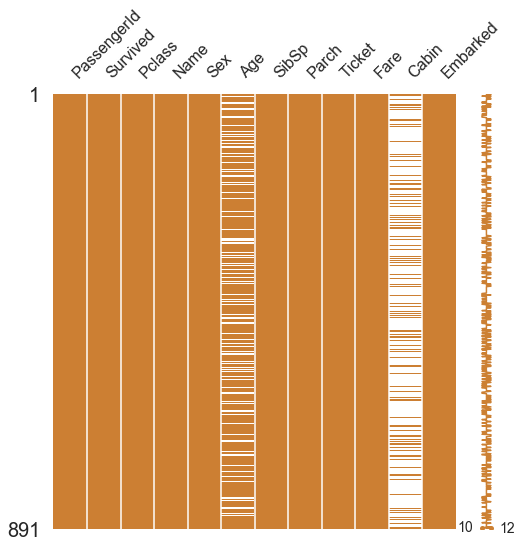

In [11]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

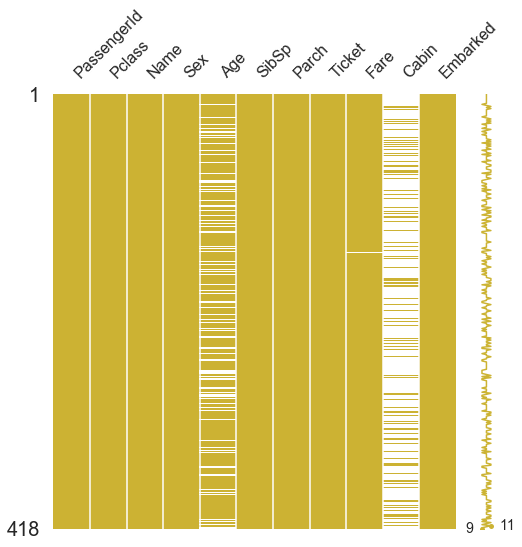

In [12]:
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8),color=(0.8, 0.7,0.2))

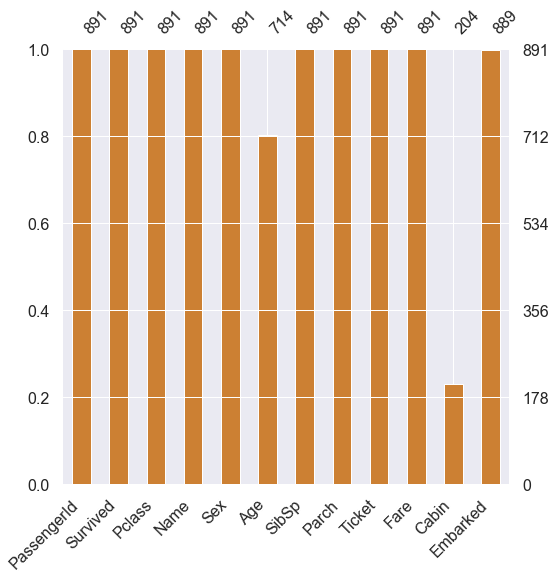

In [13]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

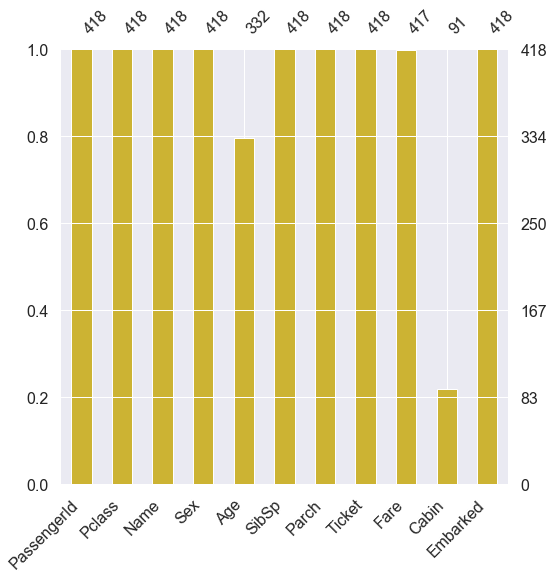

In [14]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.7, 0.2))

MANO라는 라이브러리를 사용하면 Null Data의 존재를 더 쉽게 확인할 수 있다.

### 1.2 Target Label 확인
- Target label이 어떤 분포(distribution)을 가지고 있는지 확인해야 한다.
- 지금 같은 binary classfication 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다. 

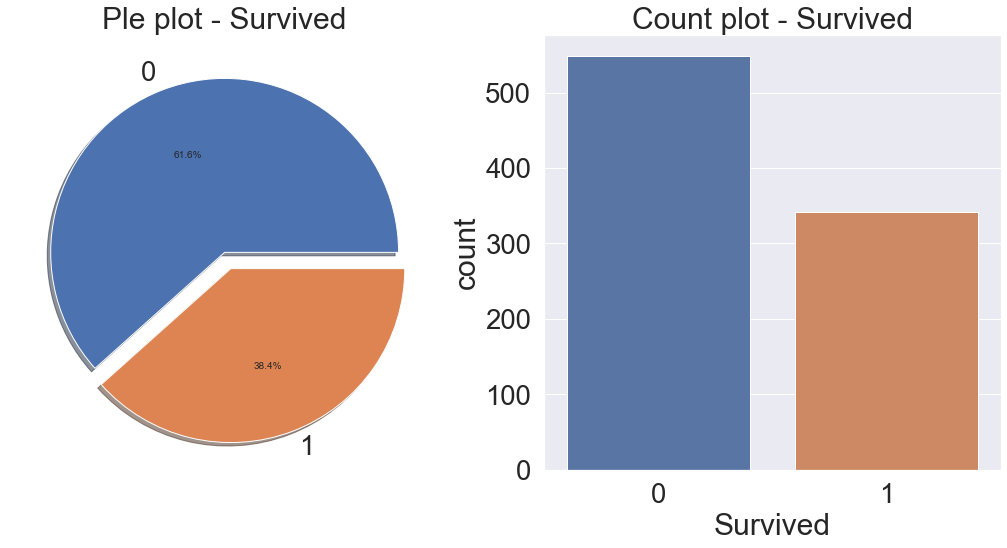

In [15]:
f, ax = plt.subplots(1,2, figsize=(18,8))

#파이차트 생성
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
#train데이터의 생존자의 수를 세어 파이플랏으로 나타낸다 (옵션 = 파이띄우기 정도 , 퍼센트 표시, 표, 그림자 표시여부)
ax[0].set_title('Ple plot - Survived')
ax[0].set_ylabel('')
# 타이틀과 ylabel 설정 

#0 과 1 카운트 그래프 생성 
sns.countplot('Survived', data=df_train, ax=ax[1]) #sns 는 seaborn 
#feature 내 데이터 개수를 세어 그래프로 표시
ax[1].set_title('Count plot - Survived')

plt.show()



- 0이 사망 1이 생존
- 사망자 수가 61.6%
- target label의 분포가 제법 균일하다고 한다. 불균일한 경우에는 다른 조치가 필요하다. 
- 그래프상으로 이상 없으니 계속 진행한다.

### 2. Exploratory Data Analysis (EDA)
- 본격적인 데이터 분석 수행을 위해 데이터의 적절한 시각화가 필요하다.
- matplotlib, seaborn, plotly 등의 시각화 라이브러리를 특정 목적에 알맞게 사용한다.

### 2.1 Pclass 
- Feature Pclass에 대해 살펴본다. Pclass는 서수형데이터, 범주형데이터, 순서형데이터이다.
- 제일 먼저 Pclass에 따른 생존률의 차이를 알아보려고 한다. 엑셀의 피벗차트와 유사한 작업으로 pandas dataframe의 groupby를 사용하여 데이터를 살펴본다. pivot도 사용가능하다.
- 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그런 다음 카운트된 각 Pclass의 0,1 개수를 평균내어 pclass별 생존률을 계산한다.
- count()를 하여 각 class에 몇 명이 있는 지 확인할 수 있으며, sum()을 하여 216명중 생존자 수의 총합계를 받는다.

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- 위 과정을 pandas의 crosstab을 사용하면 좀 더 위 과정을 훨씬 수월하게 수행할 수 있다.

In [18]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped된 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.

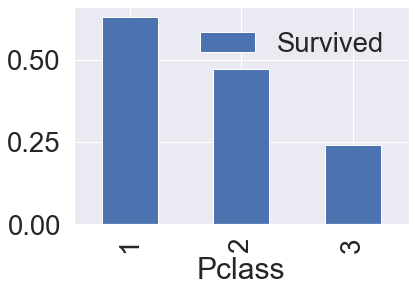

In [19]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

In [20]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- Pclass가 1st일수록 생존률이 높다는 것을 확인할 수 있다.  
Pclass 1st, 2nd, 3rd 순서대로 63%, 48%, 25%
- 좀 더 보기 쉽게 그래프를 그리기위해서는 seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인해볼 수 있다. 

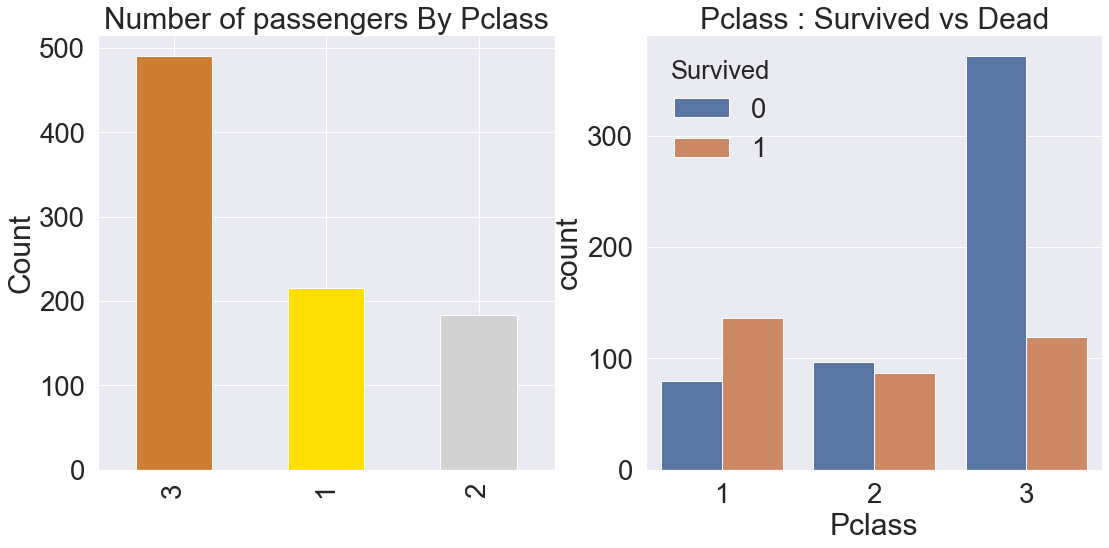

In [21]:
y_position=1.
#타이들과 차트 사이의 간격 결정 
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7E32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1]) #티켓 클래스별 Survived 데이타 값 (0,1)에 대한 갯수 
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)

plt.show()

- 생존에 Pclass가 큰 영향을 미친다고 판단 가능, 차후 모델 생성 시 이 Feature를 사용하는 것이 좋을 것 같다.

2021/02/10 1차 필사 (1.1~2.2)  
추가로 찾아볼 것
 - column 별 데이터타입 산출
 - Pclass 생존률 표시하는 방법
 - sns.countplot(data=데이터이름, x="컬럼1", hue="컬럼2")

1. df.info() 로 데이터들의 정보 확인(문자인지 숫자인지 소수점인지)  
object : 문자값 / int64 : 숫자 / float64 : 소수점 포함 값 



In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


2. groupby 객체에 mean()을 적용하면 클래스별 생존률을 확인할 수 있다

In [24]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 2.2 SEX
- 성별에 따른 생존률의 변화를 확인하는 작업 수행
- pandas groupby와 seaborn countplot 을 사용하여 시각화

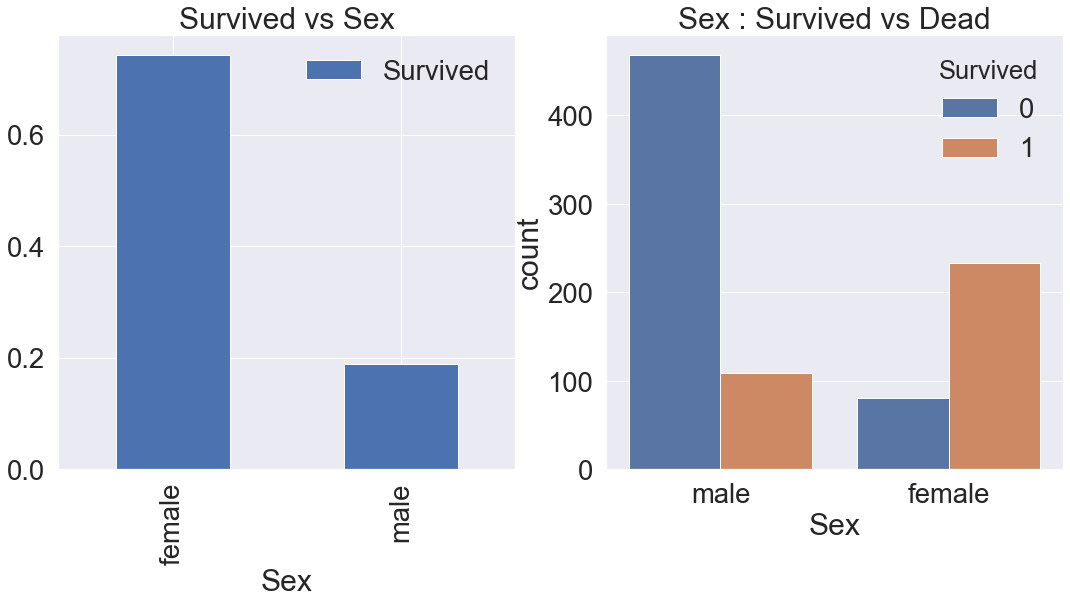

In [25]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

- 여자의 생존률이 높았다

In [26]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)
#각 성별의 Survived 평균을 구하고 출력
#as_index로 index 값을 표시할건지 아닌지 설정

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='spring_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로 Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있었다.

### 2.3 BOTH SEX AND PCLASS
- 이번에는 Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는 지 확인해본다.
- Seaborn의 factorplot을 이용하면 손쉽게 3차원으로 이루어진 그래프를 그릴 수 있다.

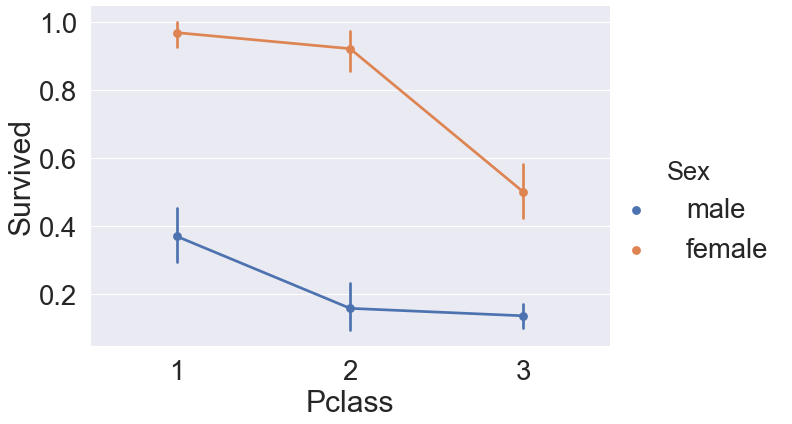

In [28]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

- 모든 클래스에서 여성이 살아남을 확률이 남성보다 높다는 것을 알 수 있다. 
- 클래스가 1에 가까울수록 (1st) 살아남을 확률이 높다. 
- hue 대신 column으로 하면 좀 더 세분화하여 판단할 수 있다.

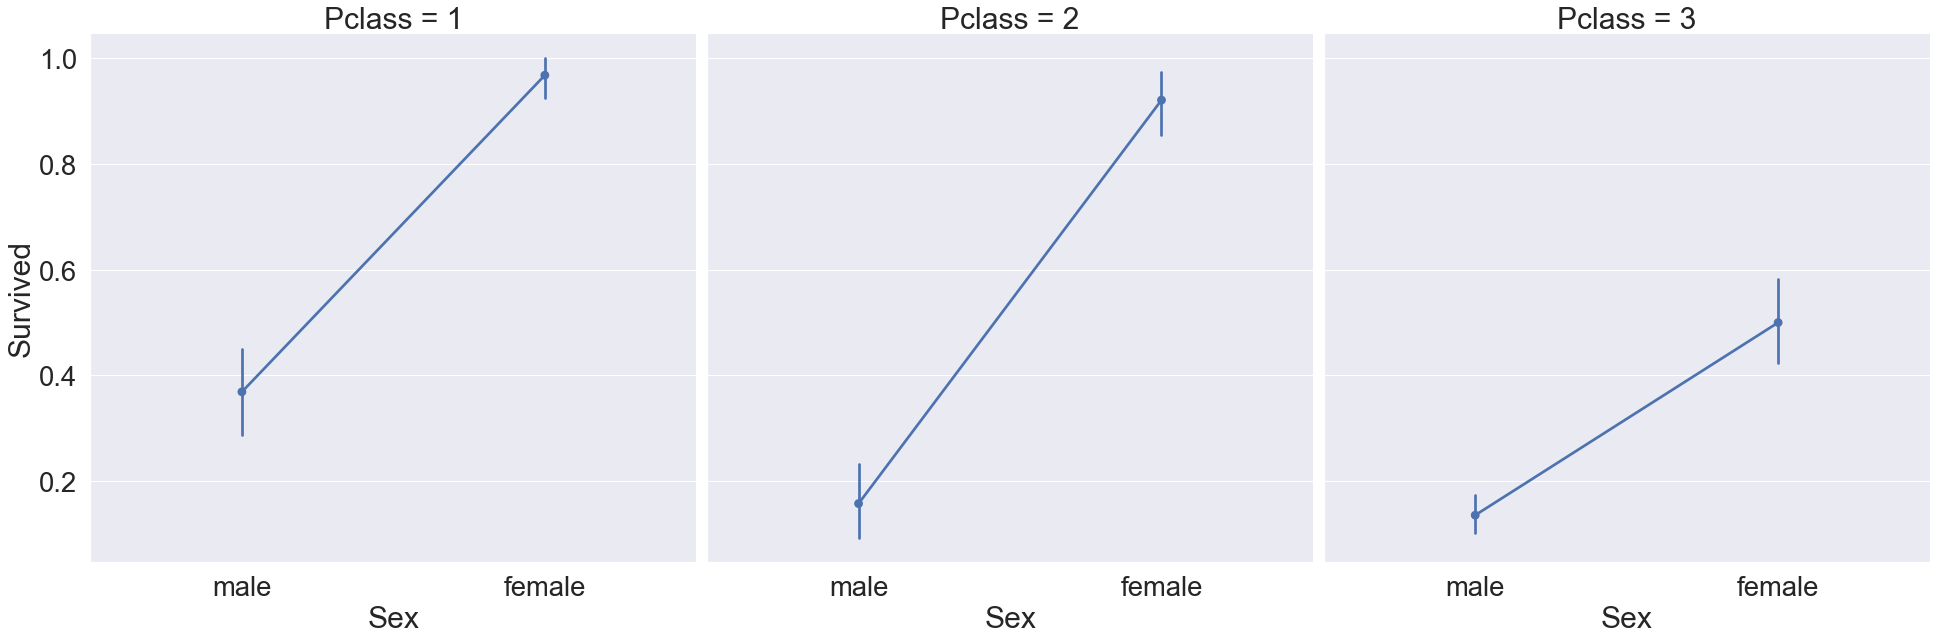

In [35]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,satureation=.5,size=9,aspect=1)

- Pclass가 높을수록 성별이 여성인 사람일수록 생존 확률이 높다는 것을 알 수 있었다.

### 2.4 AGE
- 이번에는 Age feature를 살펴보도록 하자.

In [37]:
print('제일 나이 많은 탑승객 :{:.1f} Years '.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 :{:.1f} Years '.format(df_train['Age'].min()))
print('탑승객의 평균 나이 :{:.1f} Years '.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 :80.0 Years 
제일 나이 적은 탑승객 :0.4 Years 
탑승객의 평균 나이 :29.7 Years 


- 생존에 따른 Age의 histogram 생성
 - seaborn kdeplot으로 histogram생성

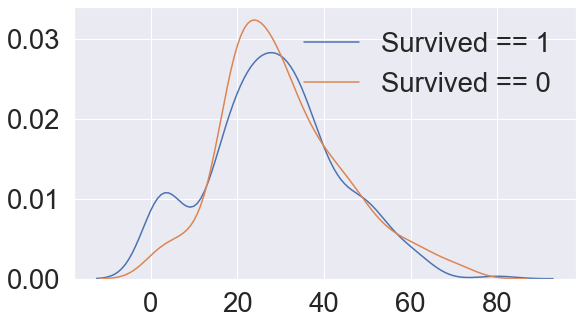

In [43]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)

plt.legend(['Survived == 1','Survived == 0'])
plt.show()

- 생존자 중에서는 나이가 어린 사람이 존재했었다는 것을 알 수 있었다.

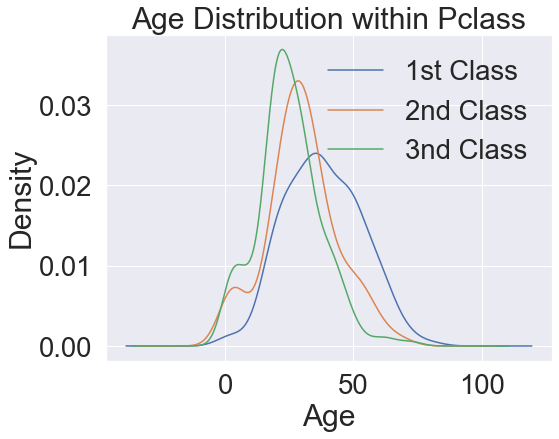

In [48]:
#Pclass 별 생존자 나이 분포 살펴보기 
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')


plt.xlabel('Age')
plt.title("Age Distribution within Pclass")
plt.legend(['1st Class','2nd Class', '3nd Class'])

 - Class가 높을수록 나이가 많은 사람의 비중이 커진다.
 - 나이대에 따른 생존률의 변화에 대해 알아보고자 한다.
 - 나이범위를 점점 넓혀가는 방법으로 생존률의 변화를 알아본다.

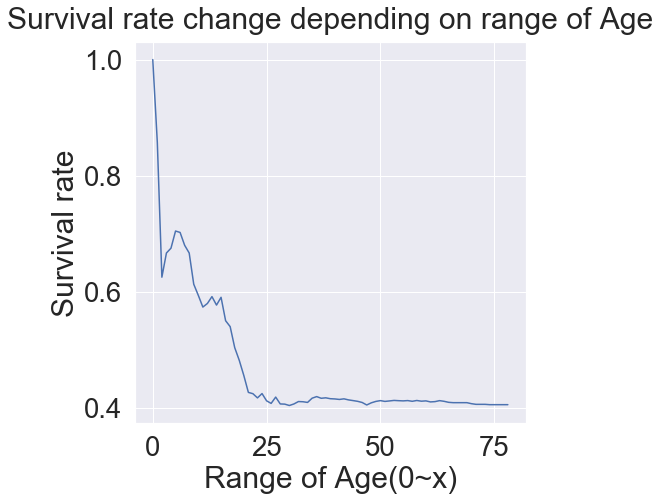

In [55]:
survival_ratio =[]
for i in range(1,80):
    survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

    
plt.figure(figsize=(7,7))
plt.plot(survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

plt.show()

- 나이가 어릴수록 생존률이 높다는 것을 확인할 수 있었다.
- Age가 중요한 feature로 쓰일 수 있다는 것을 확인하였다.

### 2.5 PCLASS, SEX, AGE
- 지금까지 본 Sex,Pclass, Age, Survived 모두에 대한 그래프를 그리고 판단한다. Seaborn의 violinplot을 활용한다.
- x축은 우리가 나눠서 보고싶어하는 case(Pclass,Sex)를 나타내고 y축은 보고싶어하는 분포(Age)이다.

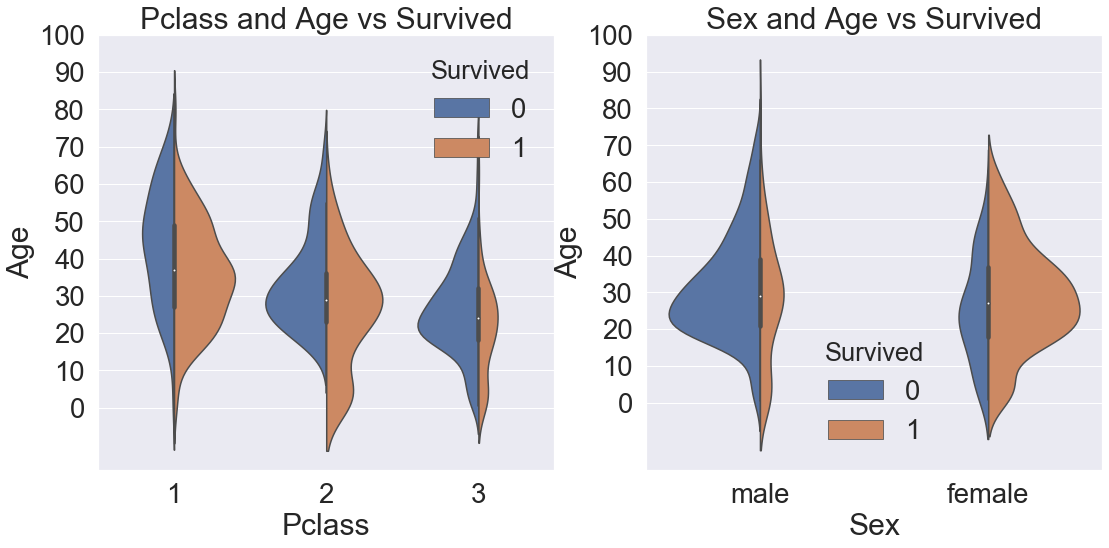

In [65]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df_train,scale='count',split=True, ax=ax[0])
sns.violinplot("Sex","Age",hue="Survived",data=df_train,scale='count',split=True, ax=ax[1])

ax[0].set_title('Pclass and Age vs Survived')
ax[1].set_title('Sex and Age vs Survived')

ax[0].set_yticks(range(0,110,10))
ax[1].set_yticks(range(0,110,10))

plt.show()

- 왼쪽 그림은 Plass별 Age의 생존 여부 분포이며 오른쪽 그림은 Sex별 Age의 생존 여부 분포이다.
- 생존 여부만 보았을 때는 모든 클래스에서 나이가 어린 사람들의 생존률이 높은 것으로 나타난다.
- 여성과 아이의 생존률이 높은 것을 보아 그들을 먼저 챙겨 구조한 것으로 보인다.

### 2.6 EMBARKED
- Enbarked는 탑승한 항구를 나타낸다.
- 탑승한 곳에 따른 생존률 변화를 살펴본다.

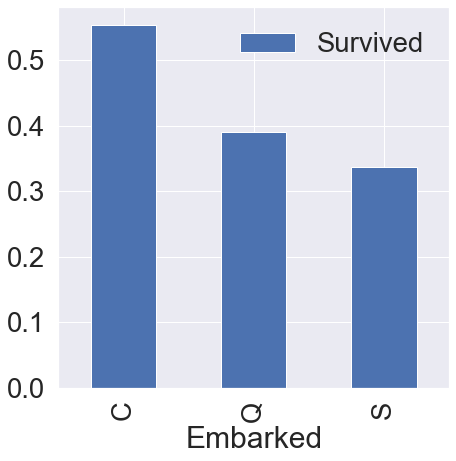

In [69]:
f , ax= plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 조금의 차이는 있지만 생존률은 크게 차이가 나지 않는 것으로 판단됨. 굳이 차이가 있다면 C가 가장 높다.

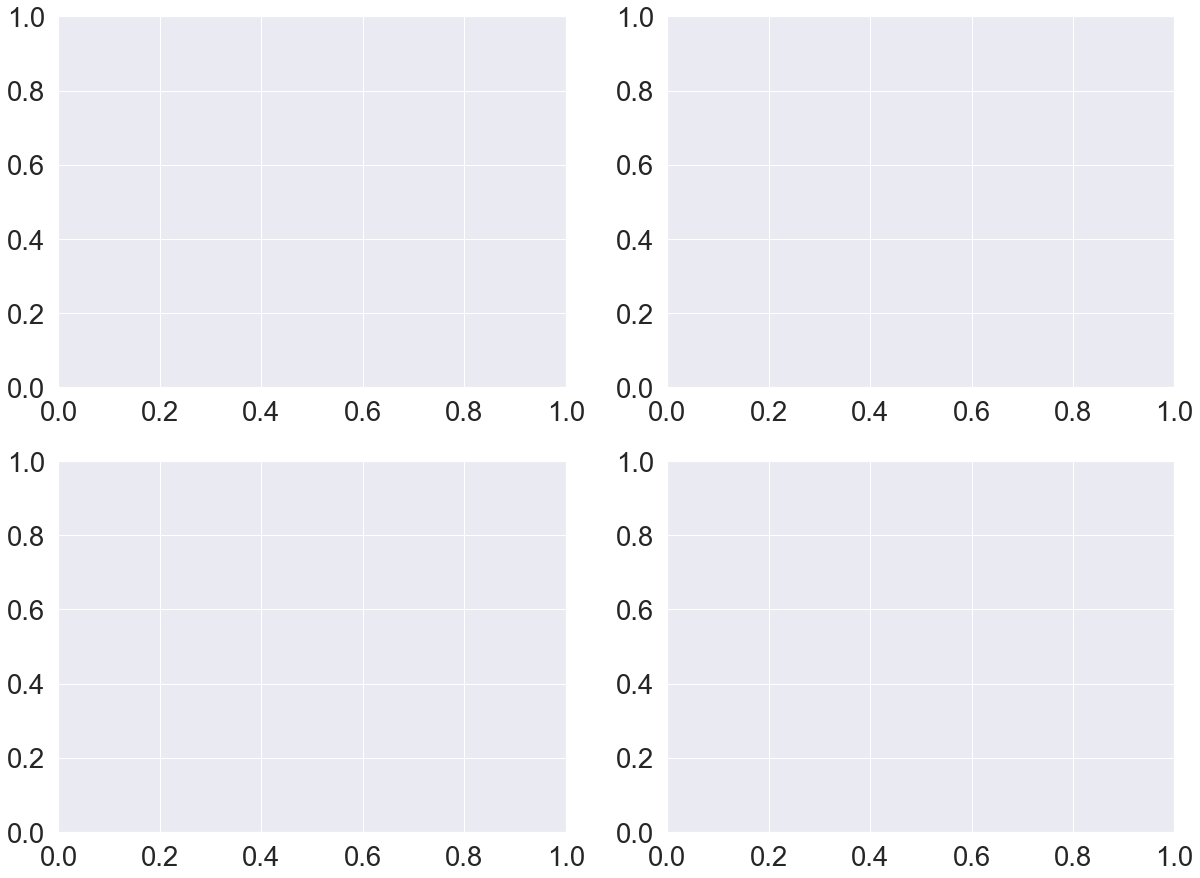

In [71]:
f, ax = plt.subplots(2,2, figsize=(20,15))